In [311]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [312]:
df = pd.read_csv('../data/semi_all_merged_dist.csv')

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109619 entries, 0 to 109618
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     109619 non-null  int64  
 1   order_id                       109619 non-null  object 
 2   customer_id                    109619 non-null  object 
 3   order_purchase_timestamp       109619 non-null  object 
 4   order_approved_at              109619 non-null  object 
 5   order_delivered_carrier_date   109619 non-null  object 
 6   order_delivered_customer_date  109619 non-null  object 
 7   order_estimated_delivery_date  109619 non-null  object 
 8   order_item_id                  109619 non-null  float64
 9   product_id                     109619 non-null  object 
 10  seller_id                      109619 non-null  object 
 11  price                          109619 non-null  float64
 12  product_category_name         

In [314]:
# 10개의 대분류로 카테고리 매칭
category_mapping = {
    # 1. 전자제품/기술
    'PC': '전자제품/기술',
    'PC 게이머': '전자제품/기술',
    '가전제품': '전자제품/기술',
    '가전제품 2': '전자제품/기술',
    '소형 가전제품': '전자제품/기술',
    '유선 전화': '전자제품/기술',
    '전화기': '전자제품/기술',
    '컴퓨터/액세서리': '전자제품/기술',
    '태블릿/프린터/이미징': '전자제품/기술',
    '오디오': '전자제품/기술',
    '전자제품': '전자제품/기술',
    '휴대용 가전/오븐/커피머신': '전자제품/기술',

    # 2. 가구/인테리어
    '가구/인테리어': '가구/인테리어',
    '부엌/서비스/다이닝/정원 가구': '가구/인테리어',
    '거실 가구': '가구/인테리어',
    '침대/매트리스/소파': '가구/인테리어',
    '침실 가구': '가구/인테리어',
    '사무용 가구': '가구/인테리어',
    '정원용품': '가구/인테리어',

    # 3. 패션/액세서리
    '패션/가방/액세서리': '패션/액세서리',
    '가방/액세서리': '패션/액세서리',
    '패션/남성복': '패션/액세서리',
    '패션/여성복': '패션/액세서리',
    '패션/아동복': '패션/액세서리',
    '패션/신발': '패션/액세서리',
    '패션/스포츠': '패션/액세서리',
    '패션/속옷 및 비치웨어': '패션/액세서리',
    '시계/선물': '패션/액세서리',

    # 4. 뷰티/건강
    '뷰티/건강': '뷰티/건강',
    '향수/미용': '뷰티/건강',
    '기저귀/위생용품': '뷰티/건강',

    # 5. 식품/음료
    '식품': '식품/음료',
    '식품/음료': '식품/음료',
    '음료': '식품/음료',

    # 6. 미디어/엔터테인먼트
    'DVD/블루레이': '미디어/엔터테인먼트',
    '콘솔/게임': '미디어/엔터테인먼트',
    '음악 CD/DVD': '미디어/엔터테인먼트',
    '음악': '미디어/엔터테인먼트',
    '영화/사진': '미디어/엔터테인먼트',

    # 7. 도서/교육
    '기술 도서': '도서/교육',
    '일반 도서': '도서/교육',
    '수입 도서': '도서/교육',

    # 8. 스포츠/야외 활동
    '스포츠/레저': '스포츠/야외 활동',
    '패션/스포츠': '스포츠/야외 활동',

    # 9. 유아/애완용품
    '유아용품': '유아/애완용품',
    '장난감': '유아/애완용품',
    '애완동물 용품': '유아/애완용품',

    # 10. 기타
    '기타': '기타',
    '크리스마스 용품': '기타',
    '파티용품': '기타',
    '표지판/보안': '기타',
    '독특한 물품': '기타',
    '라쿠진(요리 관련)': '기타',
    '보험/서비스': '기타',
    '마켓플레이스': '기타',
    '농업/산업/상업': '기타',
    '산업/상업/비즈니스': '기타',
    '건축/공구/건설': '기타',
    '건축/공구/도구': '기타',
    '건축/공구/보안': '기타',
    '건축/공구/정원': '기타',
    '건축/공구/조명': '기타',
    '주택/건축': '기타',
}



In [315]:
df_cate_merge =  df.copy()

In [316]:
# Apply the mapping
df_cate_merge['merged_category'] = df_cate_merge['product_category_name'].map(category_mapping)

In [317]:
df_cate_merge['merged_category'].unique()

array(['기타', '유아/애완용품', '가구/인테리어', '뷰티/건강', nan, '전자제품/기술', '도서/교육',
       '패션/액세서리', '스포츠/야외 활동', '미디어/엔터테인먼트', '식품/음료'], dtype=object)

In [318]:
df_price = df_cate_merge[['product_id', 'merged_category','price','order_purchase_timestamp','customer_city','dist']]

In [319]:
df_price.rename({'merged_category':'product_category_name'}, axis=1, inplace=True)

In [320]:
df_price

,product_id,product_category_name,price,order_purchase_timestamp,customer_city,dist
0,4244733e06e7ecb4970a6e2683c13e61,기타,58.90,2017-09-13 08:59:02,campos dos goytacazes,301.005664
1,e5f2d52b802189ee658865ca93d83a8f,유아/애완용품,239.90,2017-04-26 10:53:06,santa fe do sul,589.274140
2,c777355d18b72b67abbeef9df44fd0fd,가구/인테리어,199.00,2018-01-14 14:33:31,para de minas,312.495046
3,7634da152a4610f1595efa32f14722fc,뷰티/건강,12.99,2018-08-08 10:00:35,atibaia,301.951753
4,ac6c3623068f30de03045865e4e10089,가구/인테리어,199.90,2017-02-04 13:57:51,varzea paulista,646.221788
...,...,...,...,...,...,...
109614,4aa6014eceb682077f9dc4bffebc05b0,NaN,299.99,2018-04-23 13:57:06,sao luis,2755.314485
109615,32e07fd915822b0765e448c4dd74c828,전자제품/기술,350.00,2018-07-14 10:26:46,curitiba,354.848852
109616,72a30483855e2eafc67aee5dc2560482,스포츠/야외 활동,99.90,2017-10-23 17:07:56,sao paulo,338.827218
109617,9c422a519119dcad7575db5af1ba540e,전자제품/기술,55.99,2017-08-14 23:02:59,vinhedo,72.870476


In [321]:
df_price

,product_id,product_category_name,price,order_purchase_timestamp,customer_city,dist
0,4244733e06e7ecb4970a6e2683c13e61,기타,58.90,2017-09-13 08:59:02,campos dos goytacazes,301.005664
1,e5f2d52b802189ee658865ca93d83a8f,유아/애완용품,239.90,2017-04-26 10:53:06,santa fe do sul,589.274140
2,c777355d18b72b67abbeef9df44fd0fd,가구/인테리어,199.00,2018-01-14 14:33:31,para de minas,312.495046
3,7634da152a4610f1595efa32f14722fc,뷰티/건강,12.99,2018-08-08 10:00:35,atibaia,301.951753
4,ac6c3623068f30de03045865e4e10089,가구/인테리어,199.90,2017-02-04 13:57:51,varzea paulista,646.221788
...,...,...,...,...,...,...
109614,4aa6014eceb682077f9dc4bffebc05b0,NaN,299.99,2018-04-23 13:57:06,sao luis,2755.314485
109615,32e07fd915822b0765e448c4dd74c828,전자제품/기술,350.00,2018-07-14 10:26:46,curitiba,354.848852
109616,72a30483855e2eafc67aee5dc2560482,스포츠/야외 활동,99.90,2017-10-23 17:07:56,sao paulo,338.827218
109617,9c422a519119dcad7575db5af1ba540e,전자제품/기술,55.99,2017-08-14 23:02:59,vinhedo,72.870476


In [322]:
import pandas as pd

# Example DataFrame (replace with your actual data)
df_price['order_purchase_timestamp'] = pd.to_datetime(df_price['order_purchase_timestamp'])  # Ensure timestamp is in datetime format

# Extract date (optional: you can also extract month or week)
df_price['date'] = df_price['order_purchase_timestamp'].dt.date  # Aggregating by day

# Aggregate by product_category_name and date
agg_data = df_price.groupby(['product_category_name', 'date']).agg(
    total_sales=('product_id', 'count'),   # Count of products sold (demand)
    avg_price=('price', 'mean')           # Average price
).reset_index()

# Preview the aggregated data
print(agg_data)

     product_category_name        date  total_sales   avg_price
0                  가구/인테리어  2016-10-03            2   97.400000
1                  가구/인테리어  2016-10-04           16   83.923750
2                  가구/인테리어  2016-10-05            9   52.744444
3                  가구/인테리어  2016-10-06            6   69.795000
4                  가구/인테리어  2016-10-07            8  169.387500
...                    ...         ...          ...         ...
5442               패션/액세서리  2018-08-25            3  129.850000
5443               패션/액세서리  2018-08-26            3  108.633333
5444               패션/액세서리  2018-08-27            3   38.333333
5445               패션/액세서리  2018-08-28            3   52.933333
5446               패션/액세서리  2018-08-29            2  134.400000

[5447 rows x 4 columns]


In [323]:
len(agg_data['product_category_name'].unique())

10

In [324]:
agg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5447 entries, 0 to 5446
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_category_name  5447 non-null   object 
 1   date                   5447 non-null   object 
 2   total_sales            5447 non-null   int64  
 3   avg_price              5447 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 170.3+ KB


In [325]:
agg_data['day_of_week'] = pd.to_datetime(agg_data['date']).dt.dayofweek  # Day of the week (0=Monday)
agg_data['month'] = pd.to_datetime(agg_data['date']).dt.month            # Month of the year
agg_data['year'] = pd.to_datetime(agg_data['date']).dt.year              # Year

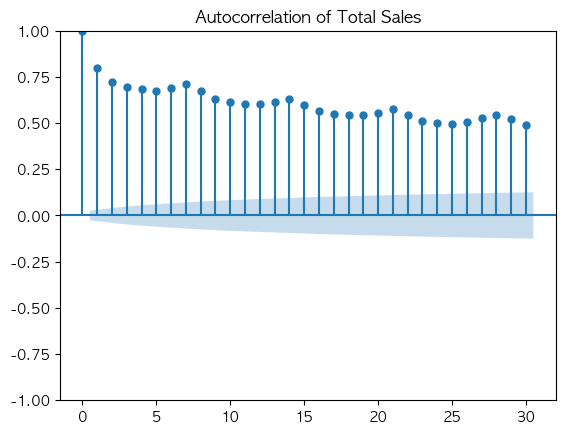

In [326]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Plot ACF
plot_acf(agg_data['total_sales'].dropna(), lags=30)
plt.title("Autocorrelation of Total Sales")
plt.show()

In [327]:
# Add multiple lags for total sales
for lag in range(1, 15):  # Include lags from 1 to 14
    agg_data[f'lag_{lag}'] = agg_data.groupby('product_category_name')['total_sales'].shift(lag)

# Add rolling mean features
agg_data['rolling_mean_7'] = agg_data.groupby('product_category_name')['total_sales'].transform(lambda x: x.rolling(window=7).mean())
agg_data['rolling_mean_14'] = agg_data.groupby('product_category_name')['total_sales'].transform(lambda x: x.rolling(window=14).mean())

# Add rolling standard deviation features
agg_data['rolling_std_7'] = agg_data.groupby('product_category_name')['total_sales'].transform(lambda x: x.rolling(window=7).std())
agg_data['rolling_std_14'] = agg_data.groupby('product_category_name')['total_sales'].transform(lambda x: x.rolling(window=14).std())

# Drop rows with NaN values resulting from shifting and rolling
agg_data = agg_data.dropna()

In [328]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import joblib

# Example feature set (updated with more features)
features = [
    'avg_price', 'day_of_week', 'month', 'year',
    'lag_1', 'lag_2', 'lag_3', 'lag_7', 'rolling_mean_7', 'rolling_std_7'
]
X = agg_data[features].dropna()  # Drop rows with NaN due to lagging
y = agg_data['total_sales'].loc[X.index]

# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the Random Forest model
model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Feature importance analysis
feature_importances = model.feature_importances_
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance:.4f}")

# Save the model for future use
joblib.dump(model, 'random_forest_model.pkl')

# Optional: Cross-validation (for better model validation)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-Validation MAE: {-cv_scores.mean():.4f}")

Mean Absolute Error (MAE): 3.672804306449255
Root Mean Squared Error (RMSE): 6.880320693853363
avg_price: 0.0125
day_of_week: 0.0430
month: 0.0051
year: 0.0010
lag_1: 0.0177
lag_2: 0.0109
lag_3: 0.0139
lag_7: 0.0101
rolling_mean_7: 0.7905
rolling_std_7: 0.0953
Cross-Validation MAE: 3.7693


In [329]:
agg_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5307 entries, 14 to 5446
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_category_name  5307 non-null   object 
 1   date                   5307 non-null   object 
 2   total_sales            5307 non-null   int64  
 3   avg_price              5307 non-null   float64
 4   day_of_week            5307 non-null   int32  
 5   month                  5307 non-null   int32  
 6   year                   5307 non-null   int32  
 7   lag_1                  5307 non-null   float64
 8   lag_2                  5307 non-null   float64
 9   lag_3                  5307 non-null   float64
 10  lag_4                  5307 non-null   float64
 11  lag_5                  5307 non-null   float64
 12  lag_6                  5307 non-null   float64
 13  lag_7                  5307 non-null   float64
 14  lag_8                  5307 non-null   float64
 15  lag_9   

In [330]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"MAE: {mae}, RMSE: {rmse}")

MAE: 3.672804306449255, RMSE: 6.880320693853363


In [331]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

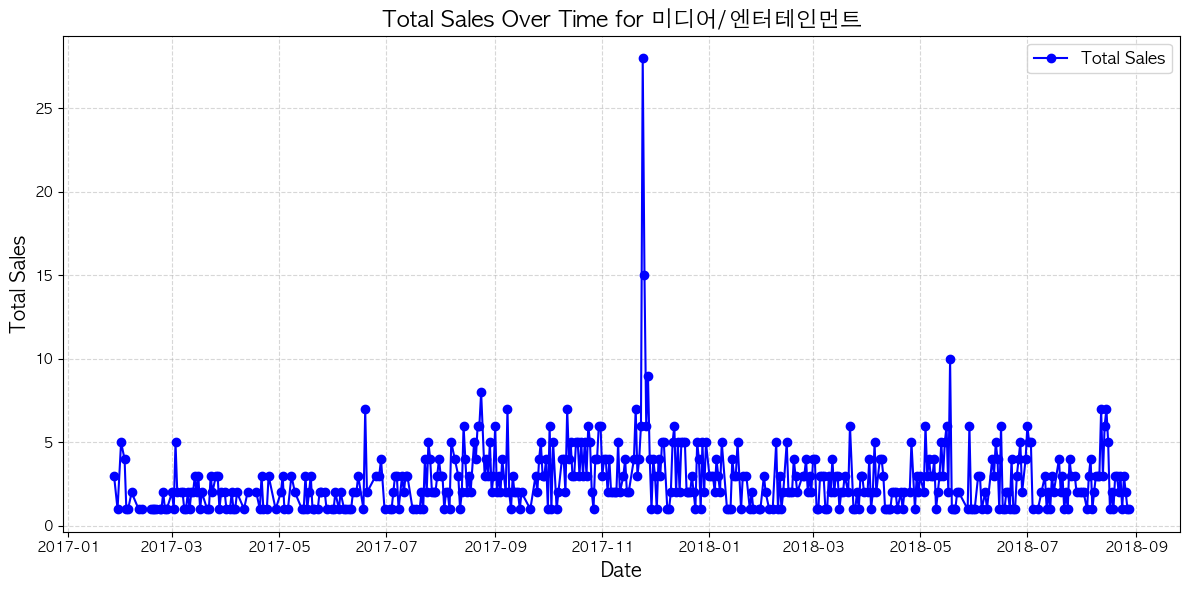

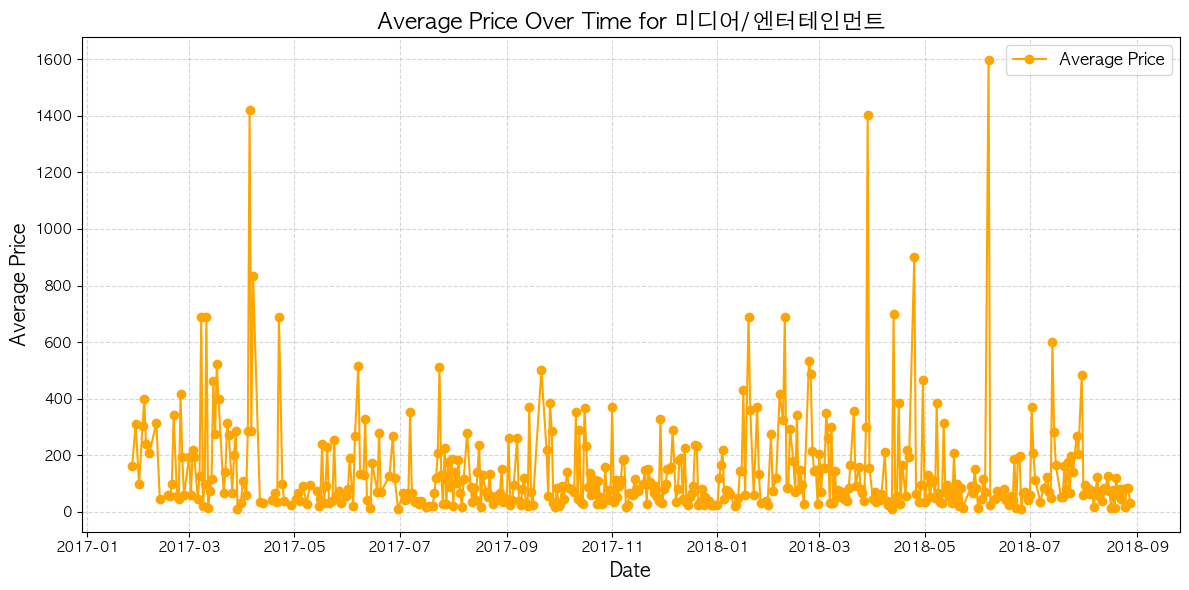

In [332]:
import matplotlib.pyplot as plt

# Ensure 'date' is in datetime format
agg_data['date'] = pd.to_datetime(agg_data['date'])

# Select a specific category for visualization
selected_category = "미디어/엔터테인먼트"  # Replace with your desired category
category_data = agg_data[agg_data['product_category_name'] == selected_category]

# Plot 1: Total Sales Over Time
plt.figure(figsize=(12, 6))
plt.plot(category_data['date'], category_data['total_sales'], marker='o', label="Total Sales", color='blue')
plt.title(f"Total Sales Over Time for {selected_category}", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('total_sales_over_time.png')  # Save the graph as a PNG file
plt.show()

# Plot 2: Average Price Over Time
plt.figure(figsize=(12, 6))
plt.plot(category_data['date'], category_data['avg_price'], marker='o', label="Average Price", color='orange')
plt.title(f"Average Price Over Time for {selected_category}", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Average Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('avg_price_over_time.png')  # Save the graph as a PNG file
plt.show()

# arima

In [206]:
agg_data.describe()

,date,total_sales,avg_price,day_of_week,month,year,lag_1,lag_7,lag_2,lag_3,...,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,rolling_mean_7,rolling_mean_14,rolling_std_7,rolling_std_14
count,5307,5307.000000,5307.000000,5307.000000,5307.000000,5307.000000,5307.000000,5307.000000,5307.000000,5307.000000,...,5307.000000,5307.000000,5307.000000,5307.000000,5307.000000,5307.000000,5307.000000,5307.000000,5307.000000,5307.000000
mean,2017-11-18 19:14:33.035613440,15.685510,122.269004,2.971170,5.919352,2017.433578,15.686263,15.632749,15.682495,15.677030,...,15.584134,15.552478,15.531374,15.511588,15.483324,15.438101,15.672643,15.615414,5.385638,5.783668
min,2017-01-12 00:00:00,1.000000,6.000000,0.000000,1.000000,2017.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.142857,0.000000,0.363137
25%,2017-06-29 12:00:00,5.000000,77.916214,1.000000,3.000000,2017.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.285714,5.428571,2.267787,2.706321
50%,2017-11-25 00:00:00,13.000000,107.290750,3.000000,6.000000,2017.000000,13.000000,13.000000,13.000000,13.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.714286,13.857143,4.503967,4.956958
75%,2018-04-12 00:00:00,22.000000,145.835023,5.000000,8.000000,2018.000000,22.000000,22.000000,22.000000,22.000000,...,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,21.714286,21.785714,7.040698,7.246257
max,2018-08-29 00:00:00,253.000000,1599.000000,6.000000,12.000000,2018.000000,253.000000,253.000000,253.000000,253.000000,...,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,106.571429,72.285714,82.178667,62.016703
std,NaN,14.120304,84.502221,1.997859,3.159758,0.495615,14.119547,14.149804,14.122906,14.127192,...,14.155557,14.150317,14.150139,14.154284,14.147407,14.134580,12.338802,11.972845,5.127074,5.245365


Performing stepwise search to minimize aic
Performing stepwise search to minimize aic
Performing stepwise search to minimize aic
Performing stepwise search to minimize aic
Performing stepwise search to minimize aic
Performing stepwise search to minimize aic
Performing stepwise search to minimize aic
Performing stepwise search to minimize aic
Performing stepwise search to minimize aic
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=1783.143, Time=11.64 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1956.505, Time=0.52 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1868.114, Time=1.79 sec
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=17.10 sec
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=1213.144, Time=17.51 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=1790.727, Time=3.48 sec ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1564.932, Time=0.33 sec

 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1954.505, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=13

 This problem is unconstrained.


 ARIMA(0,1,1)(1,0,1)[7]             : AIC=1373.763, Time=2.32 sec

At iterate    5    f=  1.82892D+00    |proj g|=  3.43453D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7      9      1     0     0   3.568D-06   1.829D+00
  F =   1.8288994521853261     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
 ARIMA(1,1,1)(0,0,0)[7]             : AIC=1374.901, Time=0.42 sec
Category: 도서/교육, MAE: 0.9532437397927943, RMSE: 1.176266942505193
 ARIMA(0,1,2)(0,0,0)[7]             : AIC=1374.834, Time=0.76 sec
 ARIMA(1,1,0)(0,0,0)[7]             : AIC=1489.459, Time=0.10 sec
 ARIMA(1,1,2)(1,0,0)[7] interce

 This problem is unconstrained.


Category: 식품/음료, MAE: 2.518212806931436, RMSE: 3.4542372551474


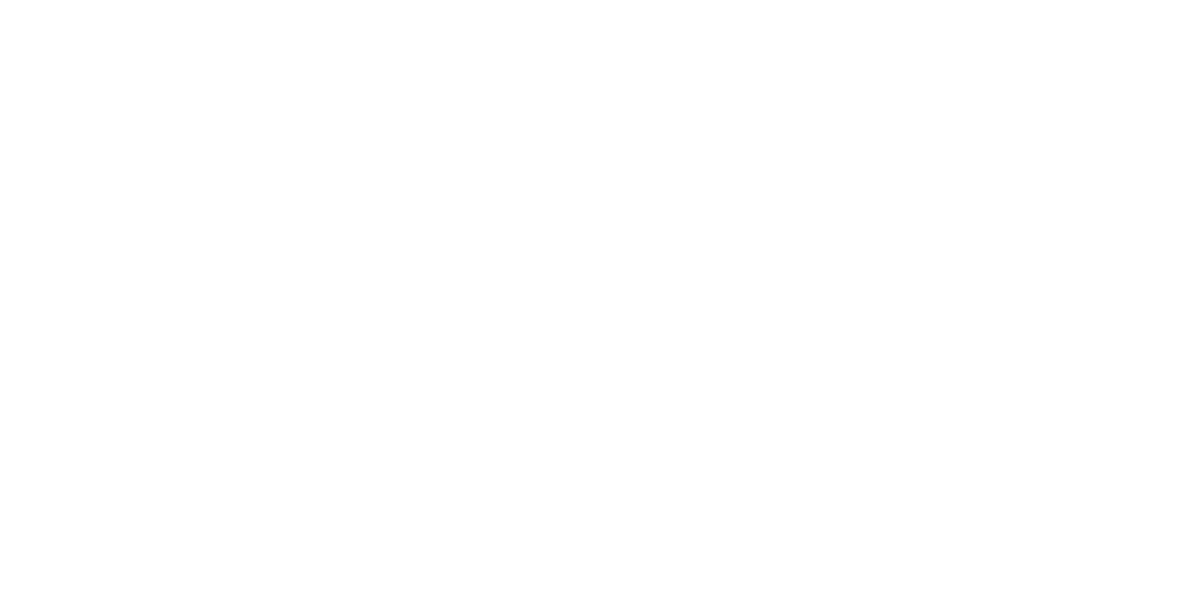

 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=inf, Time=16.71 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=inf, Time=15.98 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=inf, Time=15.90 sec
 ARIMA(1,1,2)(0,0,1)[7] intercept   : AIC=1774.798, Time=10.14 sec


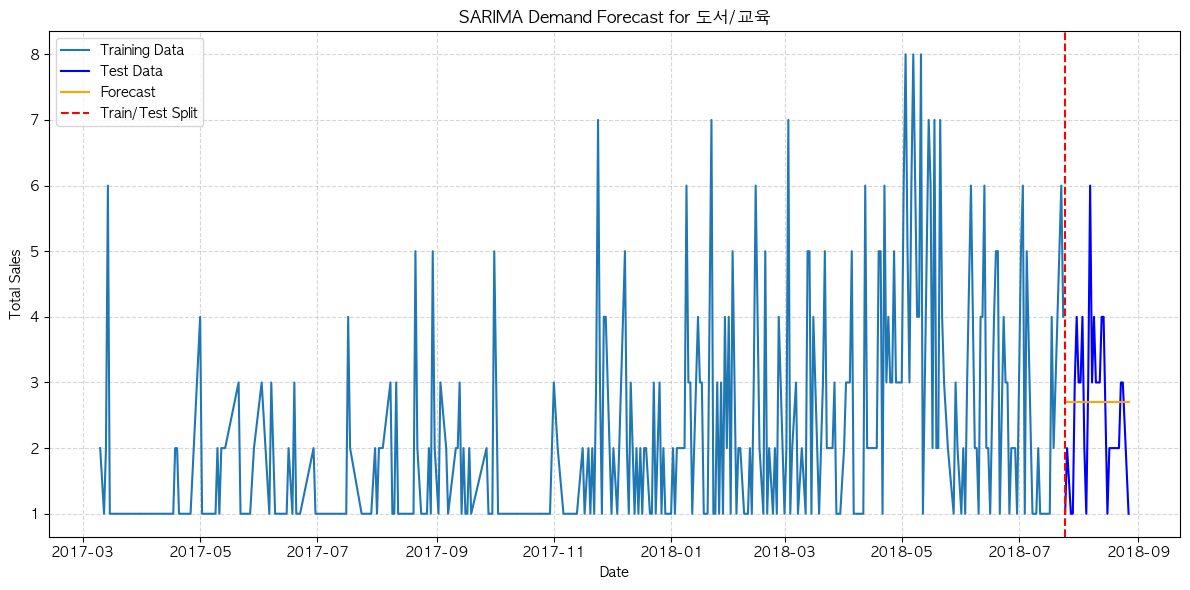

 ARIMA(0,1,0)(0,0,2)[7] intercept   : AIC=4537.424, Time=3.20 sec
 ARIMA(0,1,0)(0,0,2)[7] intercept   : AIC=3846.995, Time=3.58 sec
 ARIMA(0,1,0)(0,0,2)[7] intercept   : AIC=4223.494, Time=3.13 sec


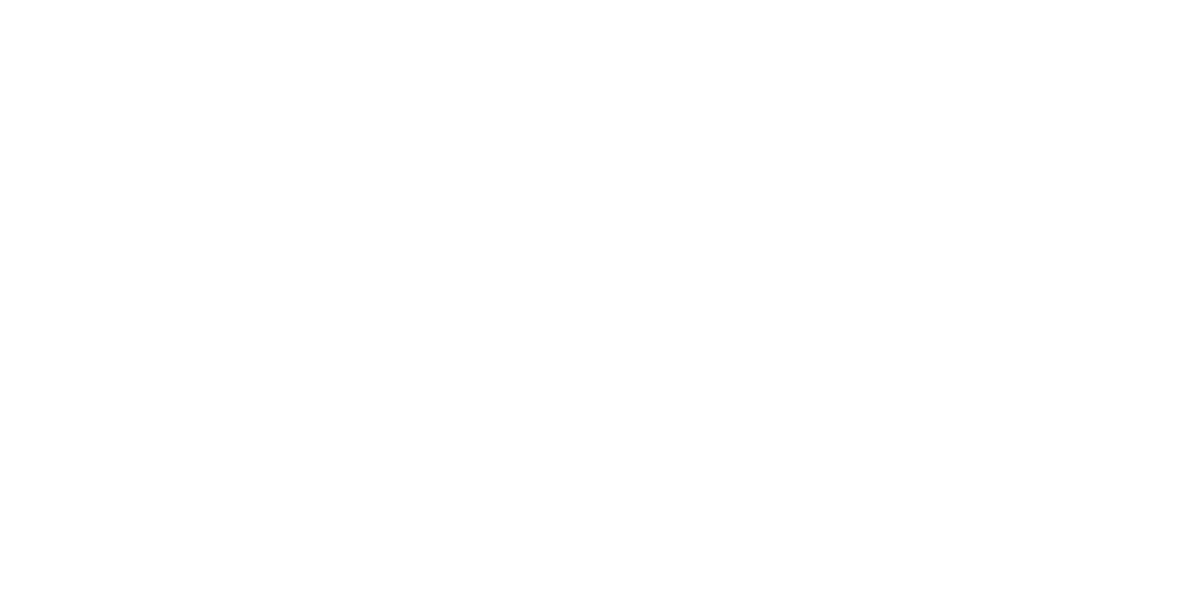

 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=4298.161, Time=15.10 sec


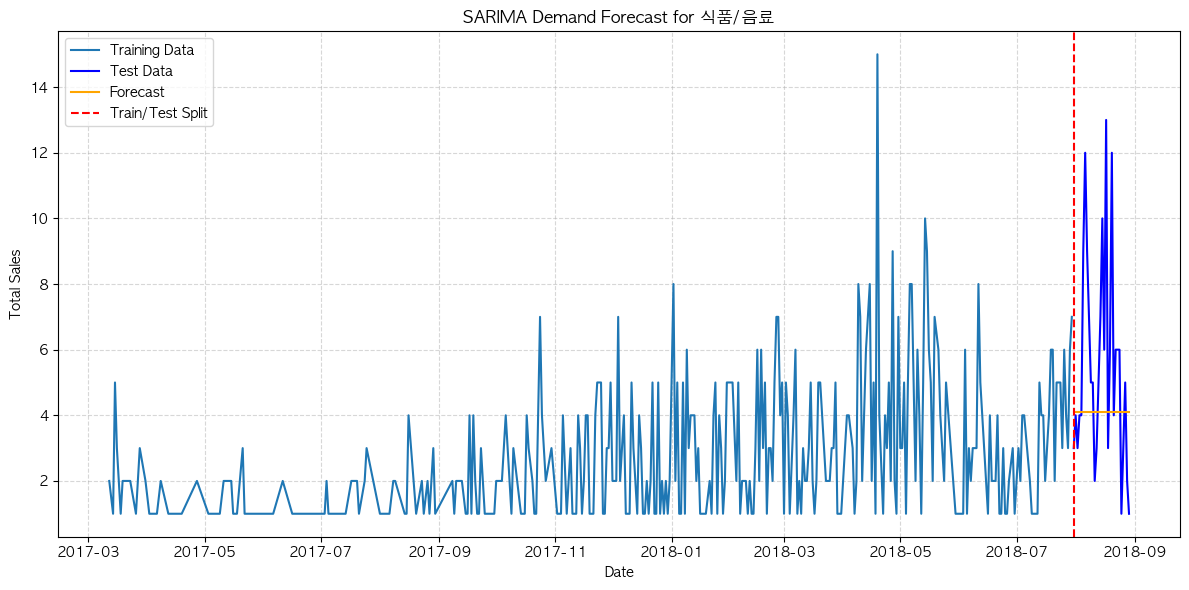

 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=inf, Time=20.87 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=inf, Time=21.86 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=4054.911, Time=1.11 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=inf, Time=18.87 sec
 ARIMA(0,1,0)(0,0,2)[7] intercept   : AIC=3722.740, Time=3.02 sec
 ARIMA(1,1,1)(0,0,2)[7] intercept   : AIC=3641.394, Time=8.44 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=3845.693, Time=1.30 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=4375.906, Time=5.85 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=3826.973, Time=3.12 sec
 ARIMA(1,1,1)(0,0,2)[7] intercept   : AIC=4413.295, Time=10.19 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=3659.963, Time=1.71 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=3645.543, Time=2.73 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=3840.085, Time=1.90 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=3674.543, Time=1.40 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=4362.634, Time=4.01 sec
 ARIMA(1,1,2)(1,0,1)[

 This problem is unconstrained.



At iterate    5    f=  2.09816D+00    |proj g|=  8.13877D-03
 ARIMA(2,1,1)(2,0,0)[7] intercept   : AIC=3659.576, Time=8.16 sec

At iterate   10    f=  2.08498D+00    |proj g|=  2.09662D-02

At iterate   15    f=  2.07480D+00    |proj g|=  1.73162D-03

At iterate   20    f=  2.07477D+00    |proj g|=  1.37067D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     30      1     0     0   1.149D-06   2.075D+00
  F =   2.0747725291834254     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Category: 미디어/엔터테인먼트, MAE: 1.2019083453339403, RMSE: 1.6372647467835368
 ARIMA(1,1,1)(2,0,2)[7] intercept   :

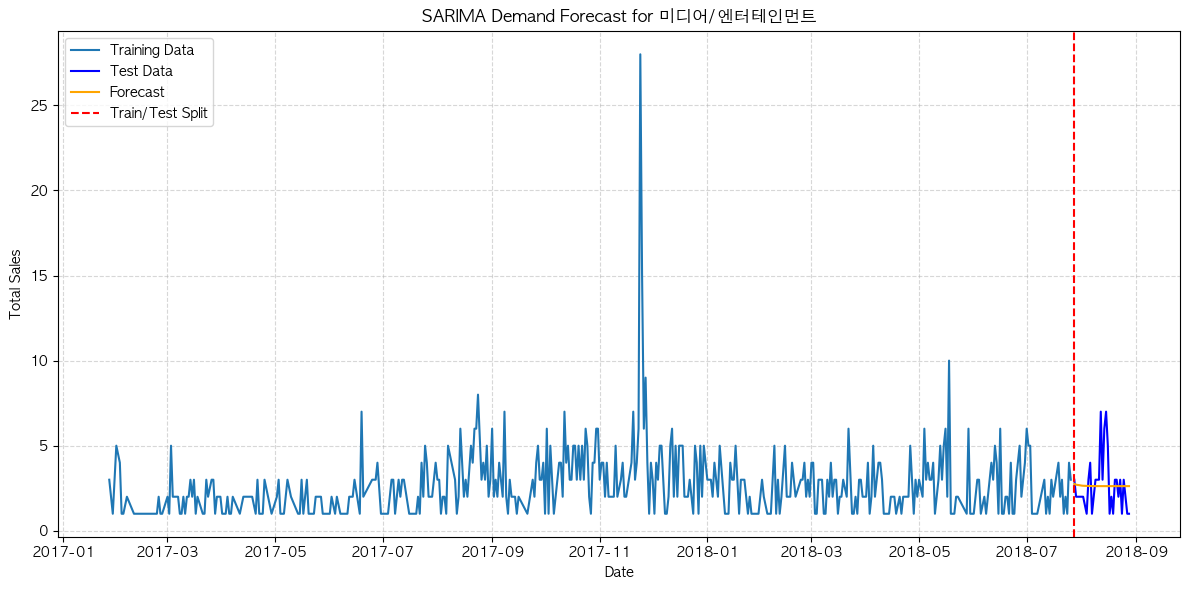

 ARIMA(1,1,2)(0,0,2)[7] intercept   : AIC=inf, Time=21.02 sec ARIMA(1,1,1)(2,0,1)[7] intercept   : AIC=3506.008, Time=20.08 sec

 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=inf, Time=13.61 sec
 ARIMA(2,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=12.70 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=3529.254, Time=1.57 sec
 ARIMA(1,1,1)(1,0,0)[7]             : AIC=3825.246, Time=1.40 sec
 ARIMA(0,1,2)(0,0,2)[7] intercept   : AIC=4433.736, Time=5.84 sec
 ARIMA(1,1,1)(0,0,0)[7]             : AIC=3838.397, Time=0.81 sec
 ARIMA(1,1,1)(2,0,0)[7]             : AIC=3826.998, Time=2.86 sec
 ARIMA(2,1,1)(0,0,1)[7] intercept   : AIC=3658.666, Time=5.12 sec
 ARIMA(1,1,1)(2,0,0)[7] intercept   : AIC=3518.775, Time=5.88 sec
 ARIMA(0,1,3)(0,0,2)[7] intercept   : AIC=4052.380, Time=7.81 sec
 ARIMA(2,1,0)(0,0,2)[7] intercept   : AIC=4483.479, Time=5.45 sec
 ARIMA(1,1,1)(2,0,1)[7] intercept   : AIC=3629.127, Time=20.32 sec
 ARIMA(1,1,1)(1,0,1)[7]             : AIC=inf, Time=6.09 sec
 ARIMA(1,1,1)(1,0,2)[7] i

 This problem is unconstrained.



At iterate    5    f=  3.40845D+00    |proj g|=  1.01868D-02

At iterate   10    f=  3.40826D+00    |proj g|=  6.86055D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     14      1     0     0   6.470D-06   3.408D+00
  F =   3.4082556274199898     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
 ARIMA(1,1,1)(2,0,2)[7] intercept   : AIC=4291.560, Time=21.52 sec
Category: 패션/액세서리, MAE: 9.55413594565494, RMSE: 11.34073866886111
 ARIMA(0,1,3)(1,0,1)[7] intercept   : AIC=inf, Time=14.56 sec
 ARIMA(1,1,1)(1,0,1)[7]             : AIC=inf, Time=4.05 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=3

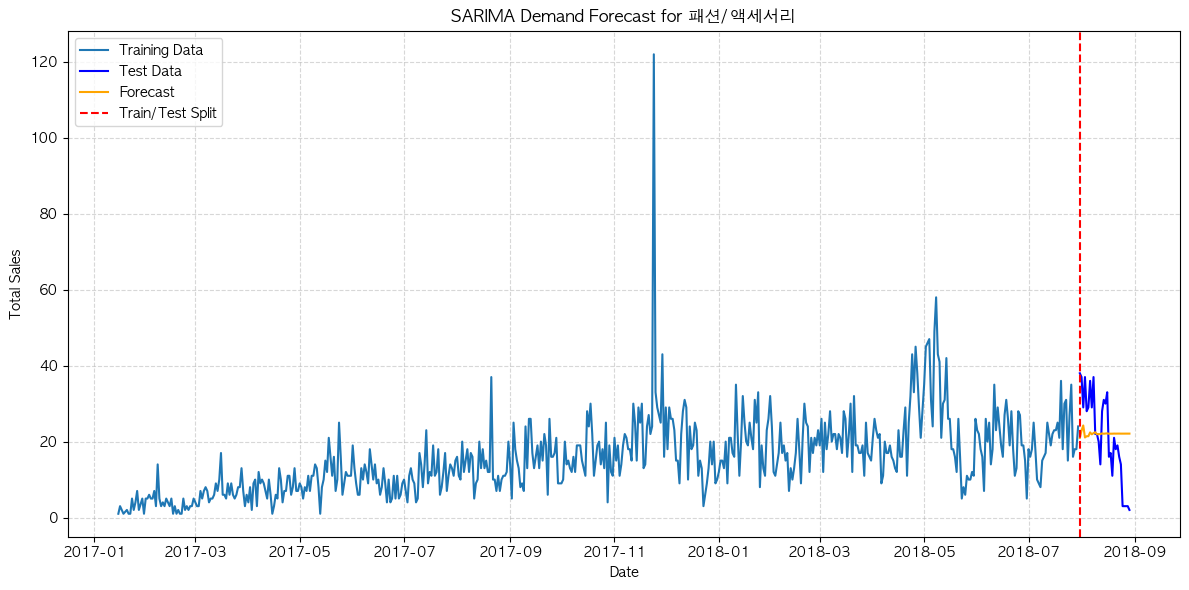

 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=4370.769, Time=5.99 sec
 ARIMA(1,1,0)(0,0,2)[7]             : AIC=4510.180, Time=2.25 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=3676.150, Time=4.63 sec
 ARIMA(2,1,1)(1,0,1)[7] intercept   : AIC=3484.120, Time=16.98 sec
 ARIMA(2,1,1)(0,0,2)[7]             : AIC=4414.055, Time=6.32 sec
 ARIMA(2,1,1)(0,0,1)[7] intercept   : AIC=3511.928, Time=5.57 sec
 ARIMA(2,1,1)(1,0,0)[7] intercept   : AIC=3509.054, Time=7.38 sec
 ARIMA(1,1,2)(1,0,2)[7] intercept   : AIC=3620.042, Time=24.25 sec
 ARIMA(1,1,2)(0,0,2)[7]             : AIC=4414.051, Time=8.81 sec
 ARIMA(2,1,1)(1,0,1)[7] intercept   : AIC=4294.696, Time=17.12 sec
 ARIMA(0,1,0)(0,0,2)[7]             : AIC=4535.426, Time=2.16 sec
 ARIMA(1,1,3)(0,0,2)[7] intercept   : AIC=inf, Time=23.14 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=3658.818, Time=23.45 sec
 ARIMA(0,1,2)(0,0,2)[7]             : AIC=4431.809, Time=6.63 sec
 ARIMA(2,1,0)(0,0,2)[7]             : AIC=4481.485, Time=4.24 sec
 ARIMA(1,1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.91762D+00    |proj g|=  7.55495D-02
 ARIMA(0,1,4)(0,0,2)[7] intercept   : AIC=inf, Time=25.24 sec

At iterate    5    f=  3.90463D+00    |proj g|=  3.25173D-02
 ARIMA(0,1,2)(1,0,1)[7] intercept   : AIC=4286.495, Time=7.74 sec

At iterate   10    f=  3.89728D+00    |proj g|=  3.61261D-03

At iterate   15    f=  3.89570D+00    |proj g|=  5.93493D-03
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=3623.306, Time=16.15 sec

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

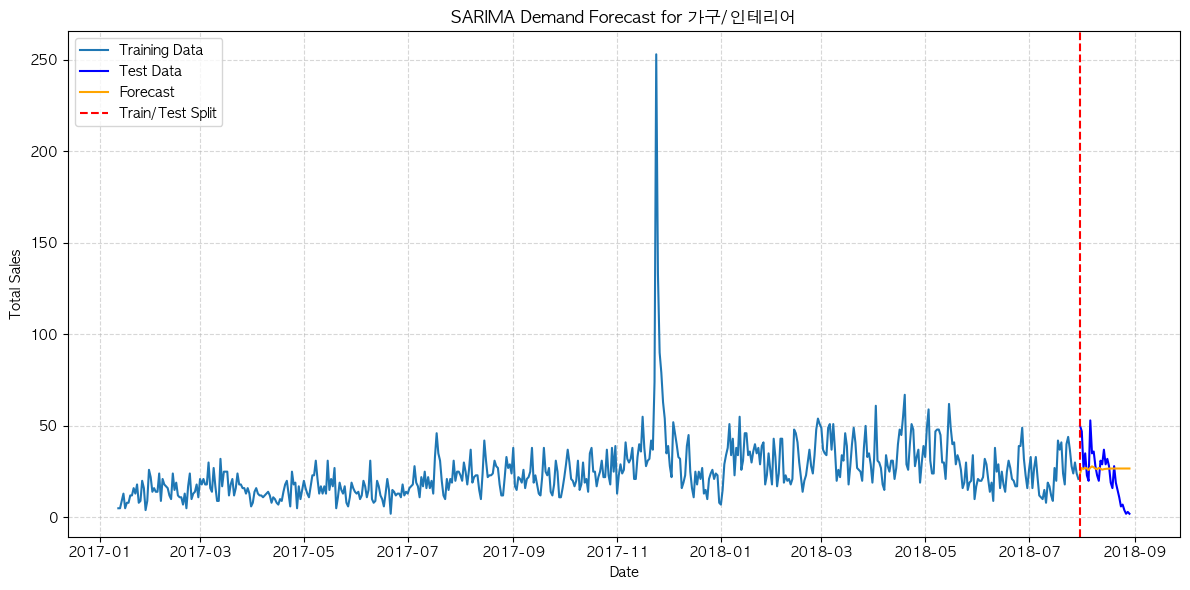

 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=3658.792, Time=17.65 sec
 ARIMA(2,1,1)(1,0,2)[7] intercept   : AIC=3485.850, Time=17.11 sec
 ARIMA(2,1,1)(0,0,0)[7] intercept   : AIC=3524.019, Time=1.37 sec
 ARIMA(0,1,2)(2,0,1)[7] intercept   : AIC=4288.409, Time=11.11 sec
 ARIMA(2,1,1)(0,0,2)[7] intercept   : AIC=3509.499, Time=9.00 sec
 ARIMA(1,1,4)(0,0,2)[7] intercept   : AIC=inf, Time=23.95 sec
 ARIMA(1,1,2)(2,0,2)[7] intercept   : AIC=inf, Time=22.08 sec
 ARIMA(0,1,3)(0,0,2)[7]             : AIC=4050.737, Time=3.41 sec
 ARIMA(1,1,2)(0,0,1)[7] intercept   : AIC=3646.337, Time=4.27 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=inf, Time=18.14 sec
 ARIMA(0,1,3)(0,0,1)[7]             : AIC=4050.909, Time=3.08 sec
 ARIMA(2,1,1)(2,0,0)[7] intercept   : AIC=3505.035, Time=8.54 sec
 ARIMA(0,1,2)(1,0,2)[7] intercept   : AIC=4288.400, Time=15.35 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=4369.499, Time=0.99 sec
 ARIMA(1,1,2)(0,0,1)[7] intercept   : AIC=inf, Time=10.56 sec
 ARIMA(0,1,2)(0,0,2)[7

 This problem is unconstrained.



At iterate    5    f=  3.86699D+00    |proj g|=  4.60465D-02

At iterate   10    f=  3.82807D+00    |proj g|=  3.06043D-02

At iterate   15    f=  3.81781D+00    |proj g|=  2.13794D-02
 ARIMA(3,1,1)(0,0,2)[7] intercept   : AIC=3510.960, Time=9.91 sec

At iterate   20    f=  3.81653D+00    |proj g|=  9.72609D-04

At iterate   25    f=  3.81653D+00    |proj g|=  5.06919D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     27      1     0     0   5.069D-06   3.817D+00
  F =   3.8165304821728392     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Category: 전자제품/기술, MAE: 14.266696548179121, RMS

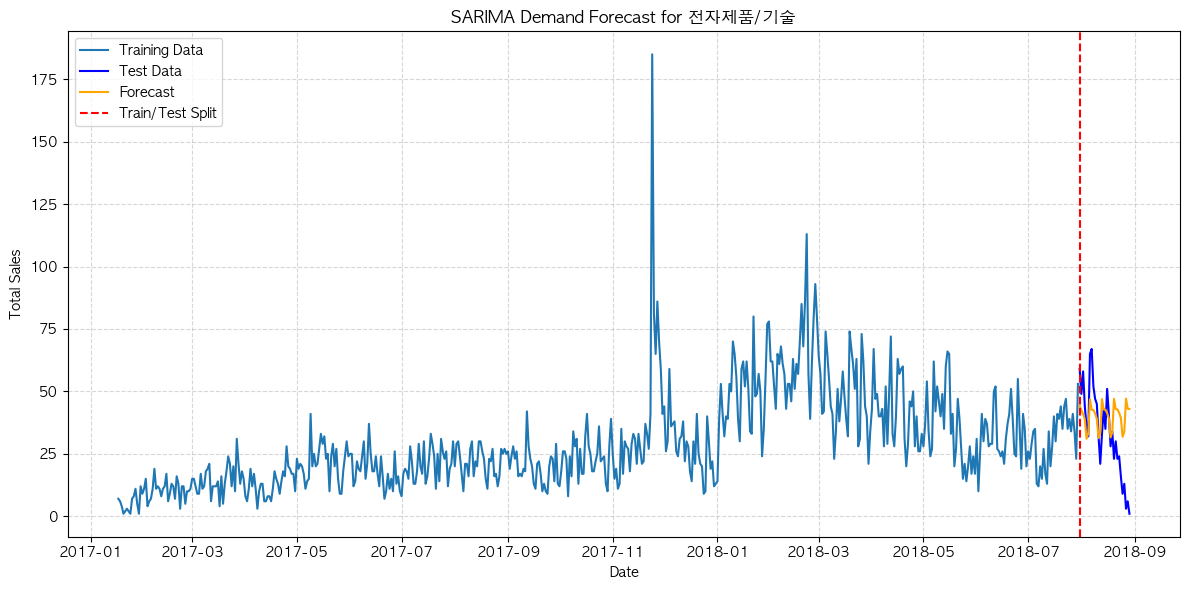

 ARIMA(2,1,4)(0,0,2)[7]             : AIC=4040.876, Time=17.35 sec

Best model:  ARIMA(1,1,3)(0,0,2)[7]          
Total fit time: 405.026 seconds
Optimal (p, d, q): (1, 1, 3), Seasonal (P, D, Q, S): (0, 0, 2, 7)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.60846D+00    |proj g|=  6.74332D-02
 ARIMA(2,1,3)(1,0,2)[7] intercept   : AIC=3640.342, Time=22.26 sec


 This problem is unconstrained.



At iterate    5    f=  3.60558D+00    |proj g|=  8.70162D-03

At iterate   10    f=  3.60524D+00    |proj g|=  4.45769D-03

At iterate   15    f=  3.60501D+00    |proj g|=  8.84025D-03
 ARIMA(3,1,1)(2,0,0)[7] intercept   : AIC=3505.934, Time=12.36 sec

At iterate   20    f=  3.59615D+00    |proj g|=  1.58104D-02

At iterate   25    f=  3.59356D+00    |proj g|=  5.17933D-03
 ARIMA(1,1,3)(0,0,1)[7] intercept   : AIC=3660.070, Time=4.58 sec

At iterate   30    f=  3.59345D+00    |proj g|=  5.75406D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     37      1     0     0   1.885D-06   3.593D+00
  F =   3.59

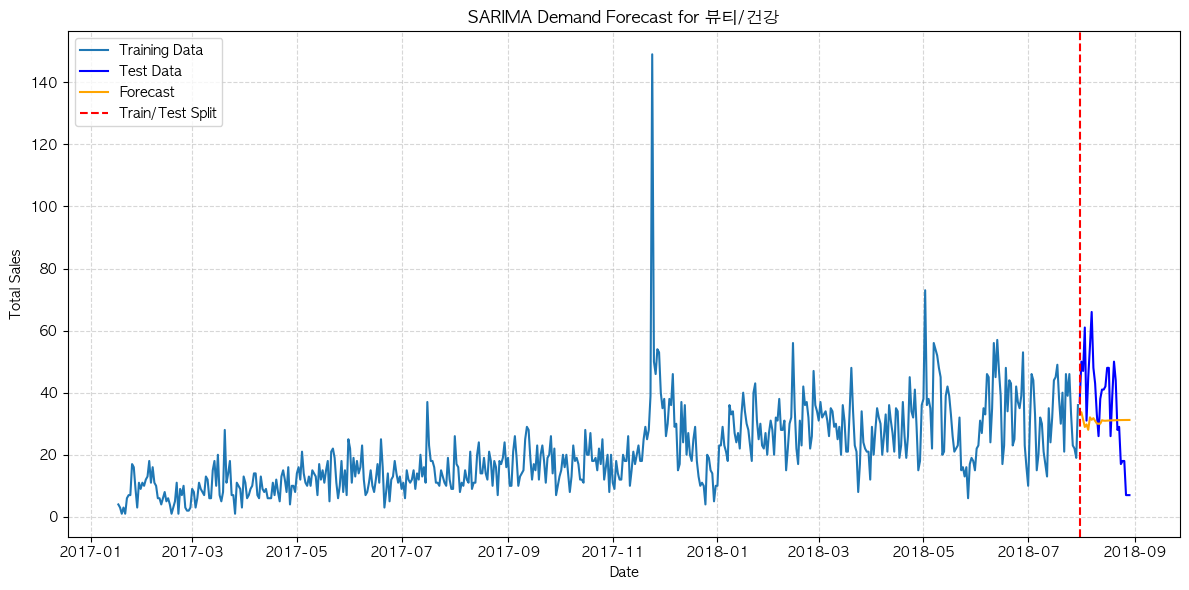

 ARIMA(3,1,3)(0,0,1)[7] intercept   : AIC=3638.945, Time=11.10 sec


KeyboardInterrupt: 

In [231]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor

# Ensure 'date' is in datetime format
agg_data['date'] = pd.to_datetime(agg_data['date'])

# Function to check if data size is sufficient
def validate_data_size(data, m):
    if len(data) < 2 * m:
        return False
    return True

# Function to forecast and evaluate demand for a specific product category
def forecast_demand_for_category(category_name, agg_data, steps=30):
    category_data = agg_data[agg_data['product_category_name'] == category_name]
    category_data = category_data[['date', 'total_sales']].set_index('date')

    freq = pd.infer_freq(category_data.index) or 'D'
    m = 7 if freq == 'D' else (12 if freq == 'M' else 1)

    if not validate_data_size(category_data, m):
        print(f"Not enough data for category {category_name}. Skipping...")
        return

    train = category_data[:-steps]
    test = category_data[-steps:]

    stepwise_model = auto_arima(
        train['total_sales'],
        seasonal=True,
        m=m,
        trace=True,
        error_action="ignore",
        suppress_warnings=True
    )
    p, d, q = stepwise_model.order
    P, D, Q, S = stepwise_model.seasonal_order
    print(f"Optimal (p, d, q): ({p}, {d}, {q}), Seasonal (P, D, Q, S): ({P}, {D}, {Q}, {S})")

    model = SARIMAX(train['total_sales'], order=(p, d, q), seasonal_order=(P, D, Q, S))
    fitted_model = model.fit()

    forecast = fitted_model.forecast(steps=steps)
    forecast.index = test.index

    mae = mean_absolute_error(test['total_sales'], forecast)
    rmse = np.sqrt(mean_squared_error(test['total_sales'], forecast))
    print(f"Category: {category_name}, MAE: {mae}, RMSE: {rmse}")

    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train['total_sales'], label="Training Data")
    plt.plot(test.index, test['total_sales'], label="Test Data", color='blue')
    plt.plot(forecast.index, forecast, label="Forecast", color='orange')
    plt.axvline(test.index[0], color='red', linestyle='--', label="Train/Test Split")
    plt.title(f"SARIMA Demand Forecast for {category_name}")
    plt.xlabel("Date")
    plt.ylabel("Total Sales")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

unique_categories = agg_data['product_category_name'].unique()
with ThreadPoolExecutor() as executor:
    executor.map(lambda cat: forecast_demand_for_category(cat, agg_data), unique_categories)

# RF,XGB,GBM

In [191]:
# !pip install lightgbm

Processing Category: 가구/인테리어
Random Forest - MAE: 6.51, RMSE: 7.98
XGBoost - MAE: 6.20, RMSE: 7.96
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 450
[LightGBM] [Info] Number of data points in the train set: 470, number of used features: 8
[LightGBM] [Info] Start training from score 24.921277
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

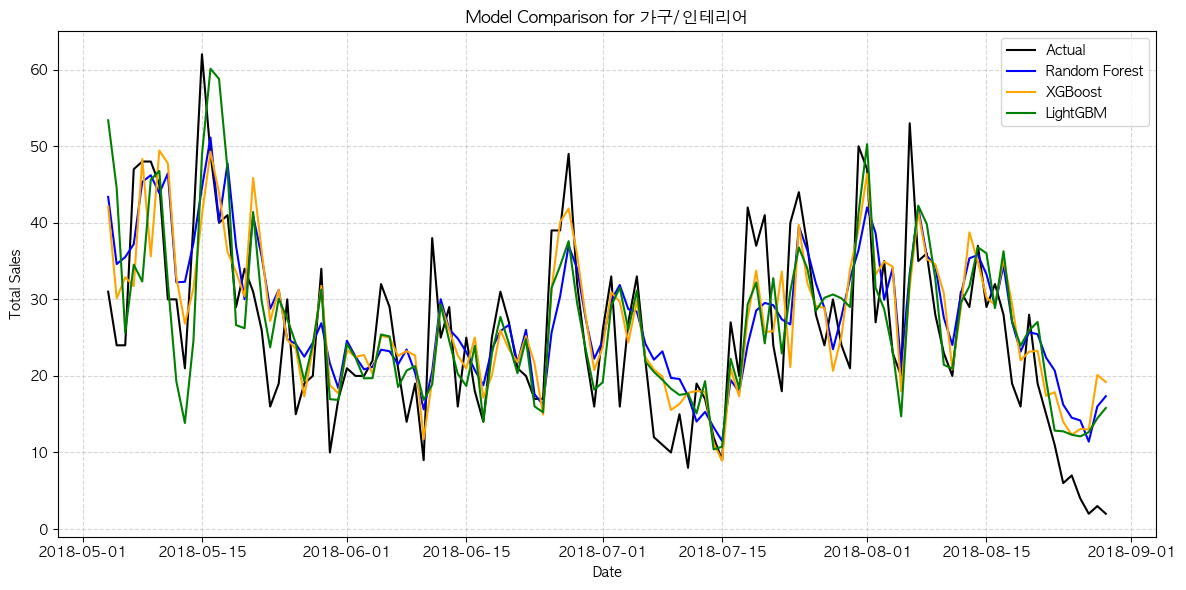

Processing Category: 기타
Random Forest - MAE: 4.22, RMSE: 5.19
XGBoost - MAE: 4.09, RMSE: 5.25
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 355
[LightGBM] [Info] Number of data points in the train set: 463, number of used features: 8
[LightGBM] [Info] Start training from score 14.231102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

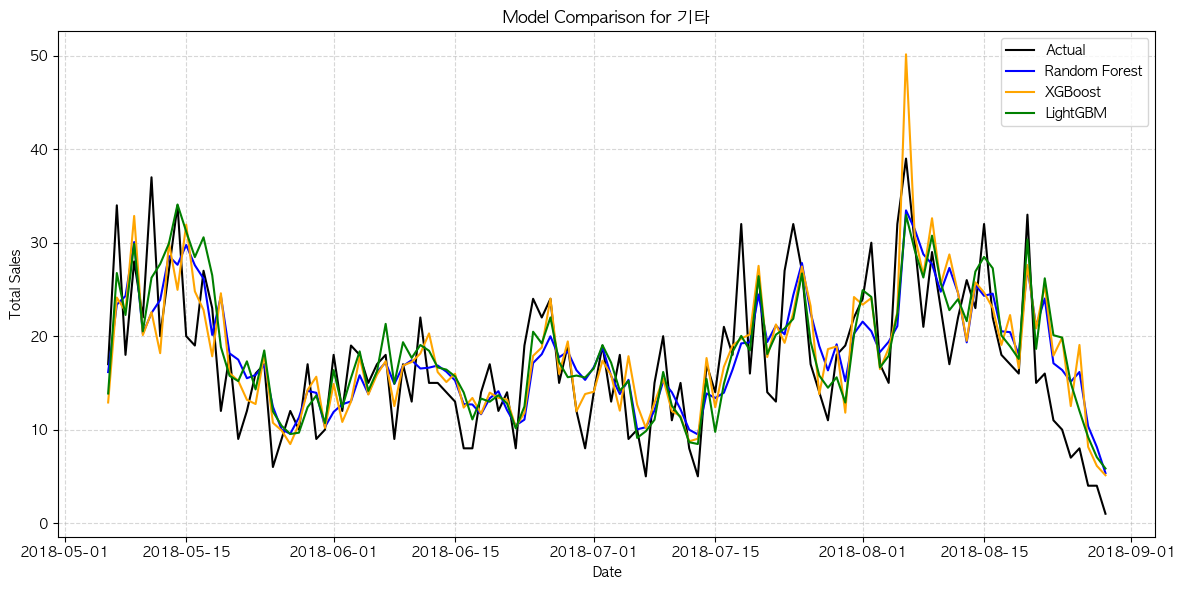

Processing Category: 도서/교육
Random Forest - MAE: 1.07, RMSE: 1.35
XGBoost - MAE: 1.20, RMSE: 1.57
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 8
[LightGBM] [Info] Start training from score 2.250000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

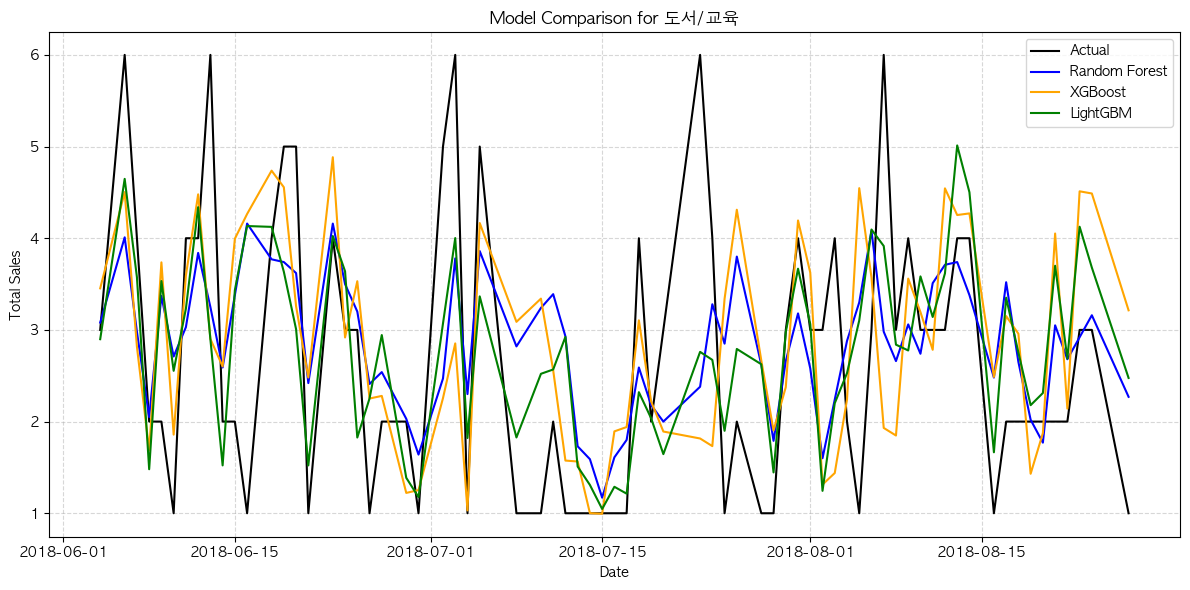

Processing Category: 미디어/엔터테인먼트
Random Forest - MAE: 1.22, RMSE: 1.55
XGBoost - MAE: 1.15, RMSE: 1.48
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 99
[LightGBM] [Info] Number of data points in the train set: 358, number of used features: 8
[LightGBM] [Info] Start training from score 2.743017
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

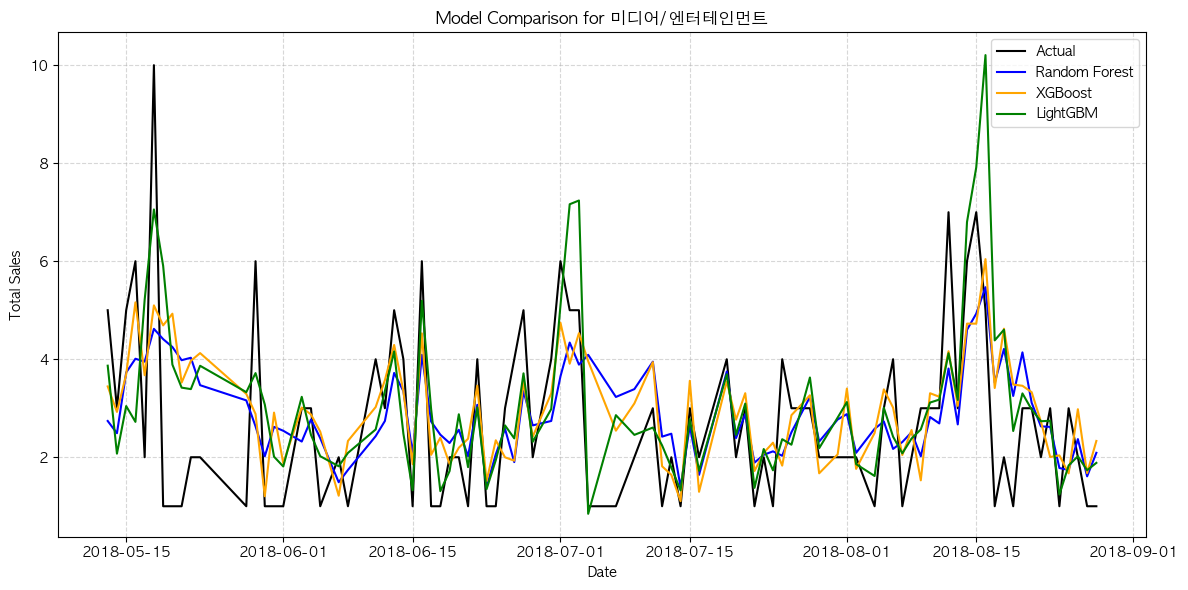

Processing Category: 뷰티/건강
Random Forest - MAE: 9.00, RMSE: 10.81
XGBoost - MAE: 10.84, RMSE: 14.78
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 421
[LightGBM] [Info] Number of data points in the train set: 466, number of used features: 8
[LightGBM] [Info] Start training from score 18.967811
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

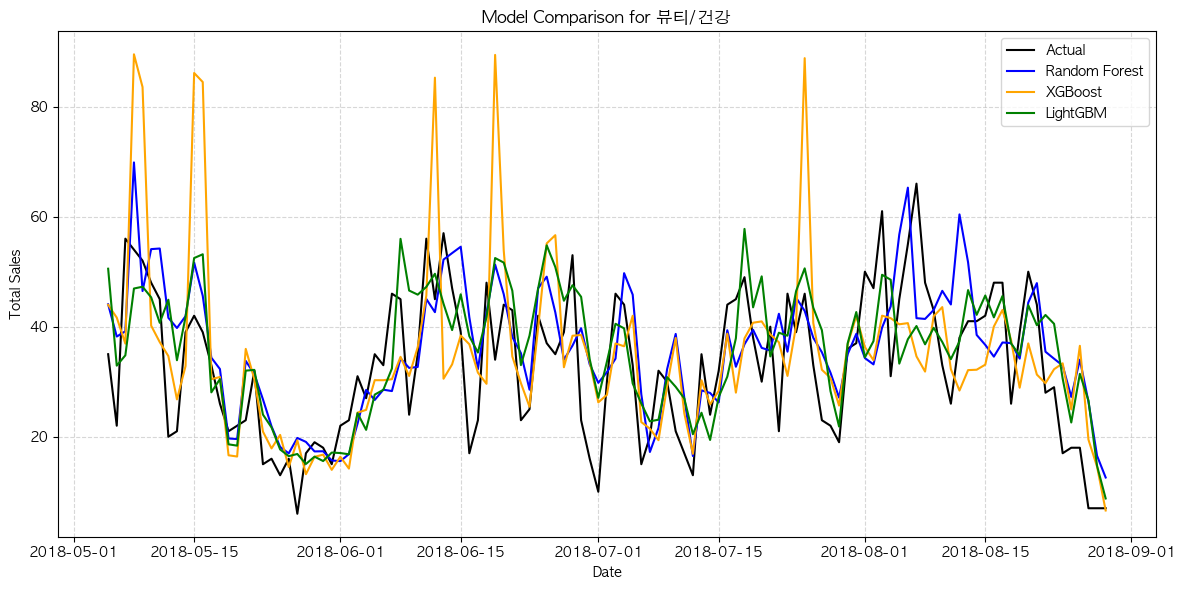

Processing Category: 스포츠/야외 활동
Random Forest - MAE: 4.26, RMSE: 5.51
XGBoost - MAE: 4.36, RMSE: 5.78
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 8
[LightGBM] [Info] Start training from score 14.288172
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

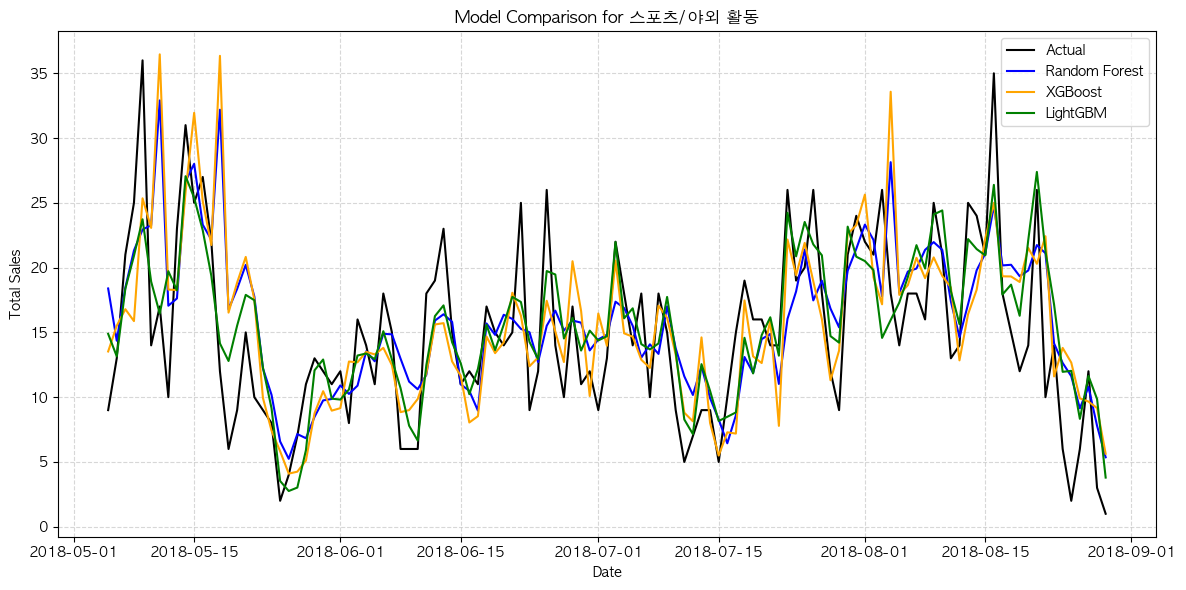

Processing Category: 식품/음료
Random Forest - MAE: 1.63, RMSE: 2.26
XGBoost - MAE: 1.62, RMSE: 2.23
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 108
[LightGBM] [Info] Number of data points in the train set: 287, number of used features: 8
[LightGBM] [Info] Start training from score 2.752613
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

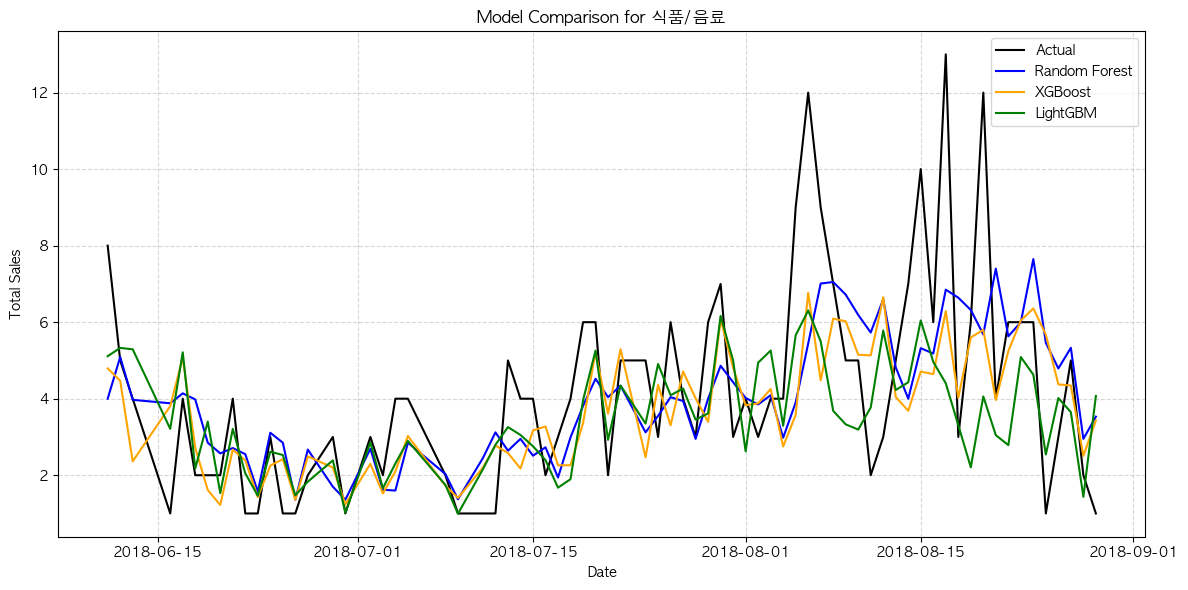

Processing Category: 유아/애완용품
Random Forest - MAE: 4.19, RMSE: 5.48
XGBoost - MAE: 4.48, RMSE: 6.00
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 369
[LightGBM] [Info] Number of data points in the train set: 464, number of used features: 8
[LightGBM] [Info] Start training from score 14.230603
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

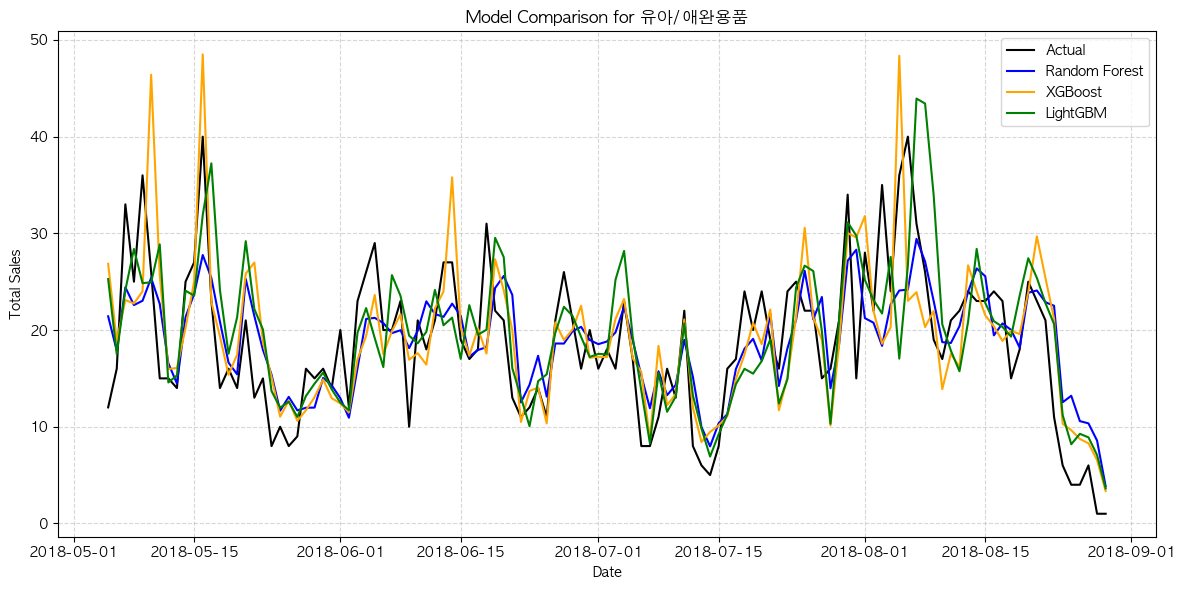

Processing Category: 전자제품/기술
Random Forest - MAE: 7.35, RMSE: 9.39
XGBoost - MAE: 7.26, RMSE: 9.62
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 466, number of used features: 8
[LightGBM] [Info] Start training from score 28.572961
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

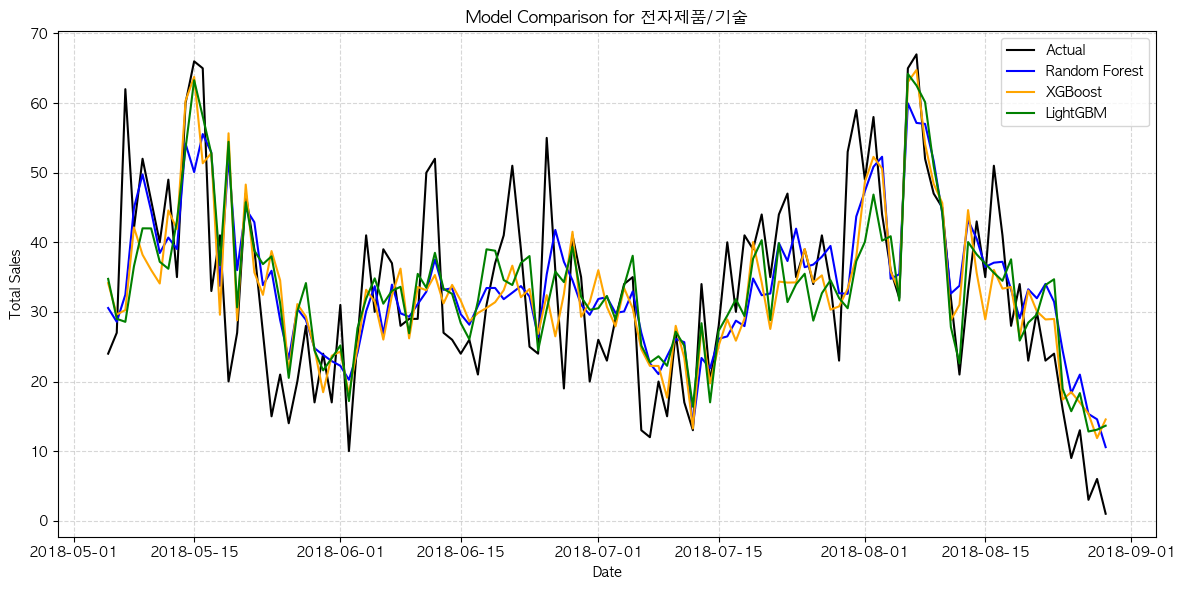

Processing Category: 패션/액세서리
Random Forest - MAE: 5.86, RMSE: 7.46
XGBoost - MAE: 5.55, RMSE: 7.18
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 355
[LightGBM] [Info] Number of data points in the train set: 466, number of used features: 8
[LightGBM] [Info] Start training from score 14.789700
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

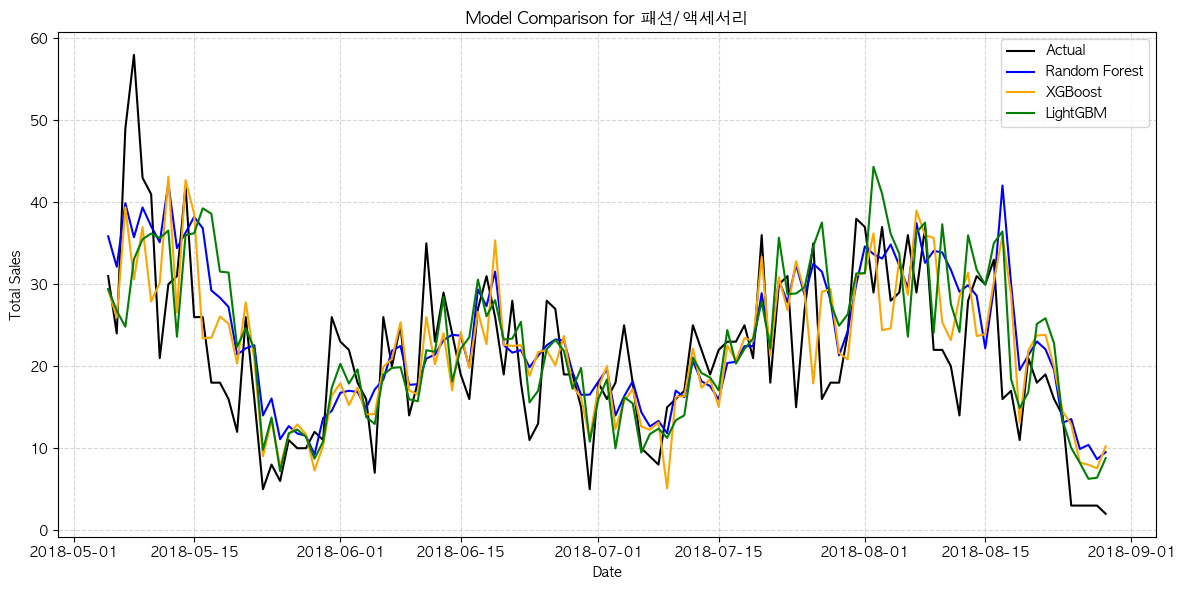

      Category          Model        MAE       RMSE
0      가구/인테리어  Random Forest   6.507542   7.984211
1      가구/인테리어        XGBoost   6.199925   7.957196
2      가구/인테리어       LightGBM   5.994472   7.731827
3           기타  Random Forest   4.215776   5.193849
4           기타        XGBoost   4.088682   5.251078
5           기타       LightGBM   3.780101   4.635643
6        도서/교육  Random Forest   1.074085   1.346720
7        도서/교육        XGBoost   1.195101   1.565809
8        도서/교육       LightGBM   0.993066   1.247348
9   미디어/엔터테인먼트  Random Forest   1.224000   1.551608
10  미디어/엔터테인먼트        XGBoost   1.152004   1.482497
11  미디어/엔터테인먼트       LightGBM   1.099748   1.511897
12       뷰티/건강  Random Forest   8.996325  10.814278
13       뷰티/건강        XGBoost  10.844974  14.784327
14       뷰티/건강       LightGBM   8.739475  10.501578
15   스포츠/야외 활동  Random Forest   4.262137   5.508865
16   스포츠/야외 활동        XGBoost   4.358138   5.784384
17   스포츠/야외 활동       LightGBM   3.340180   4.168198
18       식품/

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Prepare features for machine learning models
def prepare_features(data, look_back=7):
    # Create lag features
    for lag in range(1, look_back + 1):
        data[f'lag_{lag}'] = data['total_sales'].shift(lag)
    
    # Rolling average feature
    data['rolling_mean'] = data['total_sales'].rolling(window=look_back).mean()
    
    # Drop rows with NaN values
    data = data.dropna()
    return data

# Train, test, and evaluate a given model
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")
    
    return predictions, mae, rmse

# Compare models for all categories
def compare_models_for_all_categories(data, look_back=7):
    unique_categories = data['product_category_name'].unique()
    results = []

    for category in unique_categories:
        print(f"Processing Category: {category}")
        category_data = data[data['product_category_name'] == category]
        category_data = category_data[['date', 'total_sales']].set_index('date')

        # Prepare features
        category_data = prepare_features(category_data, look_back)

        # Define target and features
        X = category_data.drop(columns=['total_sales'])
        y = category_data['total_sales']

        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

        # Initialize models
        rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
        xgb_model = XGBRegressor(random_state=42, n_estimators=100)
        lgbm_model = LGBMRegressor(random_state=42, n_estimators=100)

        # Evaluate models
        rf_predictions, rf_mae, rf_rmse = evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest")
        xgb_predictions, xgb_mae, xgb_rmse = evaluate_model(xgb_model, X_train, y_train, X_test, y_test, "XGBoost")
        lgbm_predictions, lgbm_mae, lgbm_rmse = evaluate_model(lgbm_model, X_train, y_train, X_test, y_test, "LightGBM")

        # Append results
        results.append({
            'Category': category,
            'Model': 'Random Forest',
            'MAE': rf_mae,
            'RMSE': rf_rmse
        })
        results.append({
            'Category': category,
            'Model': 'XGBoost',
            'MAE': xgb_mae,
            'RMSE': xgb_rmse
        })
        results.append({
            'Category': category,
            'Model': 'LightGBM',
            'MAE': lgbm_mae,
            'RMSE': lgbm_rmse
        })

        # Plot predictions
        plt.figure(figsize=(12, 6))
        plt.plot(y_test.index, y_test, label="Actual", color="black")
        plt.plot(y_test.index, rf_predictions, label="Random Forest", color="blue")
        plt.plot(y_test.index, xgb_predictions, label="XGBoost", color="orange")
        plt.plot(y_test.index, lgbm_predictions, label="LightGBM", color="green")
        plt.title(f"Model Comparison for {category}")
        plt.xlabel("Date")
        plt.ylabel("Total Sales")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Load your merged category data
# Example: Assume 'agg_data' is your dataset with 'merged_category'
# Filter for one category
results_df = compare_models_for_all_categories(agg_data)

# Display the summary metrics
print(results_df)

# Save results to a CSV file
results_df.to_csv('model_comparison_results.csv', index=False)

                    MAE      RMSE
Model                            
LightGBM       4.384557  5.644516
Random Forest  4.487655  5.751319
XGBoost        4.690692  6.188932


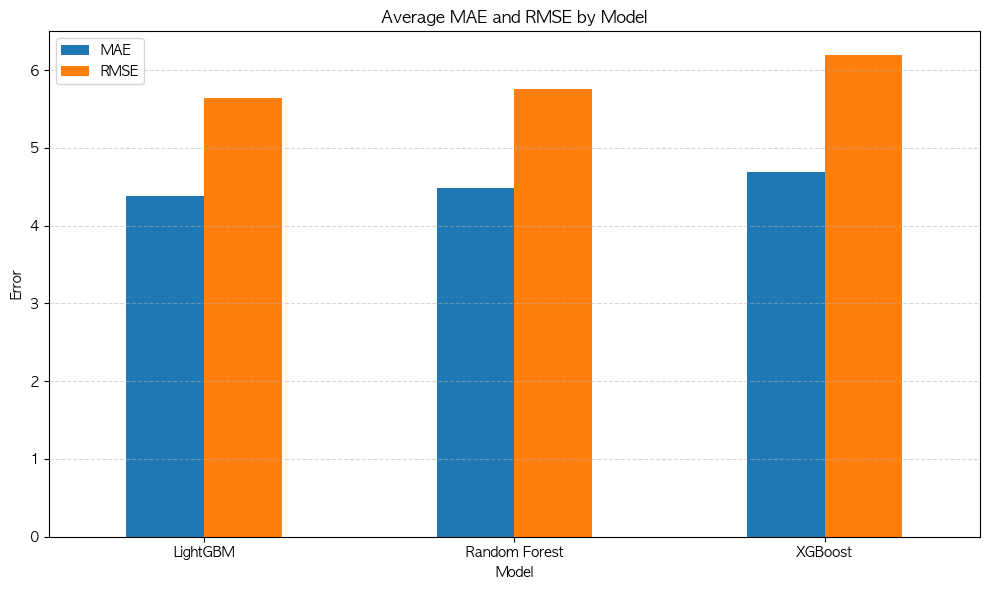

In [197]:
# Group by 'Model' and calculate the mean for numeric columns
summary = results_df.groupby('Model')[['MAE', 'RMSE']].mean()

# Print the summary
print(summary)

# Plot the average MAE and RMSE for each model
summary.plot(kind='bar', figsize=(10, 6))
plt.title("Average MAE and RMSE by Model")
plt.ylabel("Error")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# LSTM

In [234]:
agg_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5307 entries, 14 to 5446
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_category_name  5307 non-null   object        
 1   date                   5307 non-null   datetime64[ns]
 2   total_sales            5307 non-null   int64         
 3   avg_price              5307 non-null   float64       
 4   day_of_week            5307 non-null   int32         
 5   month                  5307 non-null   int32         
 6   year                   5307 non-null   int32         
 7   lag_1                  5307 non-null   float64       
 8   lag_2                  5307 non-null   float64       
 9   lag_3                  5307 non-null   float64       
 10  lag_4                  5307 non-null   float64       
 11  lag_5                  5307 non-null   float64       
 12  lag_6                  5307 non-null   float64       
 13  lag_7  

In [333]:
# agg_data.to_csv('agg_data.csv', index=False)

Training ARIMA model...
Training LSTM model...
Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 108.1420
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 241.4522
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 153.3203
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 109.8826
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 95.5571
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 204.3287
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 136.0379
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 98.4592
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 80.3861
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 148.4554
Hybrid Model - MAE: 11.309061066558892, RMSE: 14.498852557740781


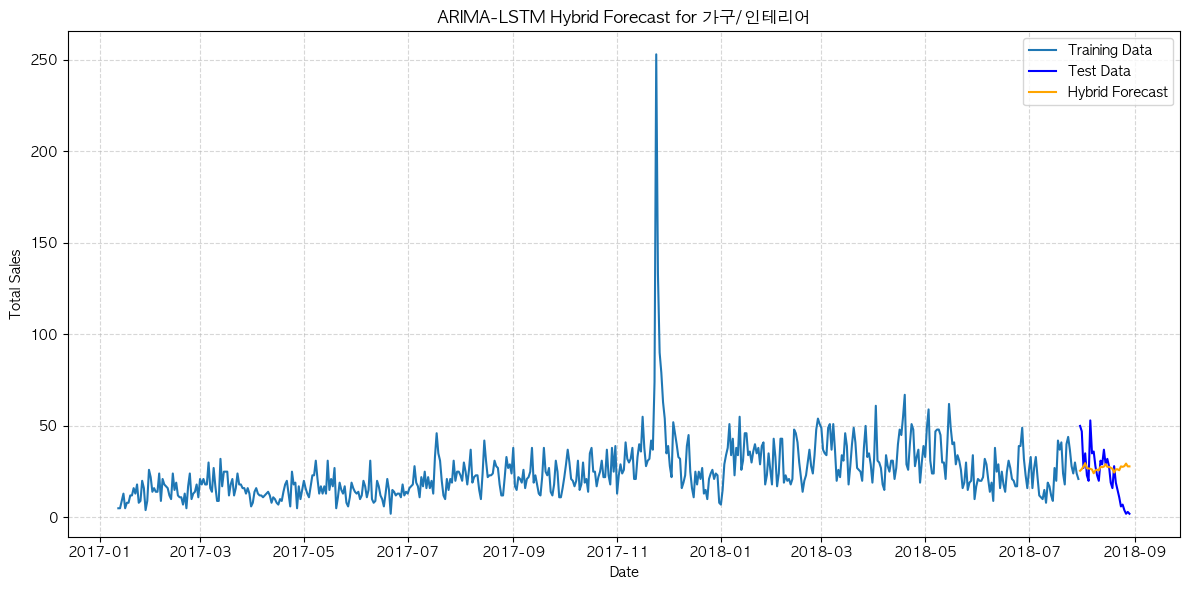

In [336]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load data
agg_data = pd.read_csv('agg_data.csv')
agg_data['date'] = pd.to_datetime(agg_data['date'])
agg_data.set_index('date', inplace=True)

# Filter a specific category for demonstration (e.g., "가구/인테리어")
category_name = "가구/인테리어"
data = agg_data[agg_data['product_category_name'] == category_name]

# Define train-test split
steps = 30
train = data[:-steps]
test = data[-steps:]

# Train ARIMA model
print("Training ARIMA model...")
arima_model = SARIMAX(train['total_sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
arima_fitted = arima_model.fit(disp=False)

# ARIMA predictions
arima_predictions = arima_fitted.forecast(steps=steps)
test['arima_forecast'] = arima_predictions

# Calculate ARIMA residuals
train['arima_fitted'] = arima_fitted.fittedvalues
train['arima_residuals'] = train['total_sales'] - train['arima_fitted']

# Prepare data for LSTM
look_back = 14  # Use 14 days of lagged data for LSTM

def create_lstm_features(data, target_column):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

lstm_train, lstm_target = create_lstm_features(train['arima_residuals'].fillna(0).values, 'arima_residuals')
lstm_train = lstm_train.reshape((lstm_train.shape[0], lstm_train.shape[1], 1))

# Build LSTM model
print("Training LSTM model...")
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(look_back, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(lstm_train, lstm_target, epochs=10, batch_size=16, verbose=1)

# LSTM predictions for residuals
lstm_test_input = train['arima_residuals'].fillna(0).values[-look_back:]
lstm_forecast = []
for _ in range(steps):
    lstm_input = lstm_test_input[-look_back:].reshape((1, look_back, 1))
    lstm_prediction = lstm_model.predict(lstm_input, verbose=0)
    lstm_forecast.append(lstm_prediction[0, 0])
    lstm_test_input = np.append(lstm_test_input, lstm_prediction[0, 0])
lstm_forecast = np.array(lstm_forecast)

test['lstm_residual_forecast'] = lstm_forecast

# Combine ARIMA and LSTM forecasts
test['final_forecast'] = test['arima_forecast'] + test['lstm_residual_forecast']

# Evaluate the hybrid model
mae = mean_absolute_error(test['total_sales'], test['final_forecast'])
rmse = np.sqrt(mean_squared_error(test['total_sales'], test['final_forecast']))
print(f"Hybrid Model - MAE: {mae}, RMSE: {rmse}")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train['total_sales'], label="Training Data")
plt.plot(test['total_sales'], label="Test Data", color='blue')
plt.plot(test['final_forecast'], label="Hybrid Forecast", color='orange')
plt.title(f"ARIMA-LSTM Hybrid Forecast for {category_name}")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Augmented Dickey-Fuller (ADF) test 

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(category_data['total_sales'])
print(f"ADF Statistic: {result[0]}")
print(f"P-Value: {result[1]}")  # P < 0.05 means the series is stationary

P-Value is less than 0.05, total_sales time series is stationary

In [82]:
# !pip install pmdarima

find optimal (p, d, q) parameters

In [ ]:
from pmdarima import auto_arima

# Automatically determine the best (p, d, q) parameters
stepwise_model = auto_arima(category_data['total_sales'], seasonal=False, trace=True)
print(stepwise_model.summary())

# Extract the best parameters
p, d, q = stepwise_model.order
print(f"Optimal (p, d, q): ({p}, {d}, {q})")

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model with the optimal parameters
model = ARIMA(category_data['total_sales'], order=(0, 0, 0))
fitted_model = model.fit()

# Print the summary of the model
print(fitted_model.summary())

## **Key Metrics from the Output**
### **1. Model Fit Metrics**
- **AIC (Akaike Information Criterion)**: 415.377
- **BIC (Bayesian Information Criterion)**: 436.608
- These are goodness-of-fit metrics. Lower values indicate a better fit. Use these metrics to compare different models (e.g., ARIMA(1, 0, 1) vs. ARIMA(2, 0, 4)).

### **2. Coefficients**
- **AR Terms (`ar.L1`, `ar.L2`)**:
  - `ar.L2` has a statistically significant effect (**P-value < 0.05**).
- **MA Terms (`ma.L1`, `ma.L2`, `ma.L4`)**:
  - `ma.L2` and `ma.L4` are statistically significant (**P-value < 0.05**).

### **3. Sigma² (Error Variance)**
- Indicates the variance of the residuals (model errors). A smaller value is better.

### **4. Ljung-Box Test (L1)**
- Tests if residuals are uncorrelated (white noise).
- **P-value = 0.40**: Indicates no significant autocorrelation in residuals, which is good.

### **5. Jarque-Bera (JB)**
- Tests if residuals are normally distributed.
- **P-value = 0.00**: Indicates that residuals are not normally distributed (common in real-world data).

### **6. Heteroskedasticity (H)**
- Tests if residuals have constant variance.
- **P-value = 0.00**: Indicates heteroskedasticity. While not ideal, it’s not a critical issue for ARIMA models.

---

## **Interpretation**
### **1. Good Fit**
- The model appears to fit the data well based on significant coefficients, low AIC, and uncorrelated residuals.

### **2. Residual Issues**
- Non-normality and heteroskedasticity in residuals could affect forecast accuracy, especially with high variance in demand.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model with the optimal parameters
model = ARIMA(category_data['total_sales'], order=(0, 0, 0))
fitted_model = model.fit()

# Print the summary of the model
print(fitted_model.summary())

In [ ]:
# Forecast the next 30 days
forecast = fitted_model.forecast(steps=30)

# Print forecast values
print(forecast)

# Plot the historical data and forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(category_data.index, category_data['total_sales'], label="Historical Sales")
plt.plot(forecast.index, forecast, label="Forecast", color='orange')
plt.title("ARIMA Demand Forecast")
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model with the optimal parameters
model = ARIMA(category_data['total_sales'], order=(2, 0, 4))
fitted_model = model.fit()

# Print the summary of the model
print(fitted_model.summary())

In [ ]:
residuals = fitted_model.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Residuals of ARIMA Model")
plt.show()

# Perform a statistical test on residuals to ensure they resemble white noise
from statsmodels.stats.diagnostic import acorr_ljungbox
print(acorr_ljungbox(residuals, lags=[10], return_df=True))

In [ ]:
# Forecast the next 30 periods (e.g., days, weeks, etc.)
forecast = fitted_model.forecast(steps=30)

# Print and plot the forecast
print(forecast)

import matplotlib.pyplot as plt

# Plot historical sales and forecast
plt.figure(figsize=(10, 6))
plt.plot(category_data.index, category_data['total_sales'], label="Historical Sales")
plt.plot(pd.date_range(category_data.index[-1], periods=30, freq='D'), forecast, label="Forecast", color='orange')
plt.title("ARIMA Demand Forecast")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
residuals = fitted_model.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Residuals of ARIMA Model")
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA model (example with seasonal order)
model = SARIMAX(category_data['total_sales'], order=(0, 0, 0), seasonal_order=(1, 1, 1, 7))
fitted_model = model.fit()

In [93]:
model = SARIMAX(category_data['total_sales'], exog=category_data['avg_price'], order=(0, 0, 0))

In [ ]:
residuals = fitted_model.resid
plt.plot(residuals)
plt.title("Residual Analysis")
plt.show()

In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import numpy as np

# mae = mean_absolute_error(actual_values, forecasted_values)
# rmse = np.sqrt(mean_squared_error(actual_values, forecasted_values))
# print(f"MAE: {mae}, RMSE: {rmse}")